# Chapter 05 - Exercises

### Exercise 5.6

**Q**

What is the equation analogous to (5.6) for action values Q(s, a) instead of state values V (s), again given returns generated using b?

**A**

The equation 5.6 is:

\begin{align*}
V(s) \stackrel{.}{=} \frac{\sum_{t \in \mathcal{T}(s)} \rho_{t:T(t)-1} G_t}{\sum_{t \in \mathcal{T}(s)} \rho_{t:T(t)-1}}
\end{align*}

And:

\begin{align*}
\rho_{t:T(t)-1} \stackrel{.}{=} \frac{\prod_{k=t}^{T-1} \pi(A_k | S_k) p(S_{k+1} | S_k, A_k)}{\prod_{k=t}^{T-1} b(A_k | S_k) p(S_{k+1} | S_k, A_k)} = \frac{\prod_{k=t}^{T-1} \pi(A_k | S_k)}{\prod_{k=t}^{T-1} b(A_k | S_k)}
\end{align*}

For $Q(s, a)$, we have $A_t=a$, so:

\begin{align*}
Q(s, a) &\stackrel{.}{=} \frac{\sum_{t \in \mathcal{T}(s, a)} \rho_{t:T(t)-1} G_t}{\sum_{t \in \mathcal{T}(s, a)} \rho_{t:T(t)-1}} \\
&= \frac{\sum_{t \in \mathcal{T}(s, a)} \rho_{t:t} \rho_{t+1:T(t)-1} G_t}{\sum_{t \in \mathcal{T}(s, a)} \rho_{t:t} \rho_{t+1:T(t)-1}} \\
&= \frac{\sum_{t \in \mathcal{T}(s, a)} \frac{\pi(A_t | S_t)}{b(A_t | S_t)} \rho_{t+1:T(t)-1} G_t}{\sum_{t \in \mathcal{T}(s, a)} \frac{\pi(A_t | S_t)}{b(A_t | S_t)} \rho_{t+1:T(t)-1}} \\
&= \frac{\sum_{t \in \mathcal{T}(s, a)} \frac{\pi(a | s)}{b(a | s)} \rho_{t+1:T(t)-1} G_t}{\sum_{t \in \mathcal{T}(s, a)} \frac{\pi(a | s)}{b(a | s)} \rho_{t+1:T(t)-1}} \\
&= \frac{\frac{\pi(a | s)}{b(a | s)} \sum_{t \in \mathcal{T}(s, a)} \rho_{t+1:T(t)-1} G_t}{\frac{\pi(a | s)}{b(a | s)} \sum_{t \in \mathcal{T}(s, a)} \rho_{t+1:T(t)-1}} \\
&= \frac{\sum_{t \in \mathcal{T}(s, a)} \rho_{t+1:T(t)-1} G_t}{\sum_{t \in \mathcal{T}(s, a)} \rho_{t+1:T(t)-1}}
\end{align*}

In which $\mathcal{T}(s, a)$ are the occurences (or first occurence in the episode for first-visit Monte Carlo) of the state s and action a across all episodes.

Because $A_t=a$, the first term in the product that generate $\rho_{t:T(t)-1}$ is a constant, and can be isolated outside the sum. 

In a weighted importance sampling (which is the case above), the constant is present both in the numerator and denominator and cancel each other, that is, the importance-sampling ratio, $\rho$, can consider only the times from $t+1$ onwards in a weighted importance sampling for $Q(s, a)$.



### Exercise 5.7

**Q**

In learning curves such as those shown in Figure 5.3 error generally decreases with training, as indeed happened for the ordinary importance-sampling method. But for the weighted importance-sampling method error first increased and then decreased. Why do you think this happened?

**A**

As defined in the example:

- The dealer is showing a deuce.
- The sum of the player's card is 13.
- The player has a usable ace.
- The target policy is to stick only on a sum of 20 or 21.
- The behavior policy is to choose to hit or stick randomly.
- The error for each amount of episodes is averaged among 100 independent runs.

An increased mean squared error means that the calculated value for the state was more distant from the target. In this state, we have an ace, which is expected to show different behaviors depending on whether you reach 20/21 and stop, or exceed, changing the value of the ace from 11 to 1 and trying to reach 20/21 again, which can be seen as a 2nd chance to reach the expected sum.

The values are estimated from the behavior policy, scaling the returns by the importance-sampling ratio ($\rho$), and then dividing by the sum of the ratios (weighted average). Because the target policy only accepts time-steps that ends in 20 or 21 (stopping when reaching any of these states), or exceeds (because the new card value makes the sum exceed 21), all other cases are dismissed (the ratio is 0). Also, the target policy is deterministic ($\pi(hit|s) = 1$ when $sum < 20$, $\pi(stick|s) = 1$ when $20 <= sum$) while the behavior policy for $n-1$ hits and 1 stick (ending the episode), or n hits, exceeding 21 and losing, has n time-steps and has a probability of happening equal to $2^{-n}$, because it's a random policy with 2 actions, so $b(a|s) = 0.5$ for any $a \in \mathcal{A}(s) = \{hit, stick\}$. 

This means that for a higher amount of hits, the probability of the random policy actually executing those actions reduces exponentially, maybe requiring the completion of a huge number of episodes to simulate one such case.

In the given state, the player has an ace, but the number of time-steps to end the episode when 20 or 21 is reached directly is smaller than the number of time-steps if it's exceeded and the ace has its value changed to 1, trying again and reaching 20 or 21, or exceeding 21 and losing. The cases in which the player loses will, on average, have more time-steps (due to more hits). It's possible that many (or even all) among the 100 independent runs of the episodes in the first attempts never reach the case in which the player loses, choosing to stick before (even in cases in which the player has sum less than 20, which will be ignored in the ratio), or exceeds 21 after the player reaches 20 or 21 (in which it would have stopped in the target policy, so not considered in the ratio), making the state have a value higher than it should have.

It eventually converges in the expected value as more episodes are completed, and more runs have cases in which the player loses that can happen in the target policy. 

It's important to note that cases in which the player exceeds 21 will have a much lower probability of happening than cases in which the player sticks to 20/21 using the behavior (random) policy, and because the probability for the target policy will be 1 (in the valid cases in which 20 or 21 was not reached in some previous step), the value of $\rho$ will be higher, giving more weight to these cases, evetually compensating the lower frequency.

*Note:* It's also possible that the behavior policy never reaches 20/21 in the first episodes, which would also influence the target policy value (it would be 0, because no sequence of actions across all runs using the behavior policy are possible under the target policy). Actually, this can happen for any initial states, even those without a usable ace. That said, considering that it's done an average across 100 independent runs, and reaching 20/21 can be done in very few steps, it's more likely to be the first case provided in this answer (there are no case in which the player exceeds 21, but there are cases in which the player stops at 20/21).

### Exercise 5.8

**Q**

The results with Example 5.5 and shown in Figure 5.4 used a first-visit MC method. Suppose that instead an every-visit MC method was used on the same problem. Would the variance of the estimator still be infinite? Why or why not?

**A**

Yes. The increase in value is exponential, while the every-visit MC would simply average the results of an episode accross the occurences, so the total would still diverges into infinite.

Mathematically, while the case for first visits can be defined as:

\begin{align*}
\mathbb{E}[X^2] &= \mathbb{E}_b[(\rho_{t:T(t)-1} G_0)^2] \\
&= \mathbb{E}_b[\rho_{t:T(t)-1}^2] \\
&= \mathbb{E}_b\left[\left(\prod_{t=0}^{T-1} \frac{\pi(A_t | S_t)}{b(A_t | S_t)}\right)^2\right] \\
&= \sum_{k=0}^{\infty} \left(b(left | s) \cdot p(s_T | s, left) \cdot \left(\frac{\pi(left | s)}{b(left | s)}\right)^2\right) \left(b(left | s)^k \cdot p(s | s, left)^k \cdot \left(\prod_{t=0}^k \frac{\pi(left | s)}{b(left | s)}\right)^2\right) \\
&= \sum_{k=0}^{\infty} \left(0.5 \cdot 0.1 \cdot \left(\frac{1}{0.5}\right)^2\right) \cdot \left(0.5^k \cdot 0.9^k \cdot \left(\prod_{t=0}^k \frac{1}{0.5}\right)^2\right) \\
&= \sum_{k=0}^{\infty} (0.5 \cdot 0.1 \cdot 2^2) \cdot \left(0.5^k \cdot 0.9^k \cdot \left(\prod_{t=0}^k 2^k\right)^2\right) \\
&= \sum_{k=0}^{\infty} 0.2 \cdot \left(\left(\frac{1}{2}\right)^k \cdot 0.9^k \cdot 2^{2k}\right) \\
&= 0.2 \sum_{k=0}^{\infty} 0.9^k \cdot \frac{2^{2k}}{2^k} \\
&= 0.2 \sum_{k=0}^{\infty} 0.9^k \cdot 2^k \\
&= 0.2 \sum_{k=0}^{\infty} 1.8^k \\
&= \infty
\end{align*}

The above is calculated considering only the cases in which the left action is chosen (the ratio, $\rho$, ignores the right action, because the target policy only chooses the left action). So it considers all possibilities, weighed by the probabilities of each occurence (the probability of choosing the action using the behaviour (random) policy, 0.5, and the probability of staying in the same state, 0.9, or ending the episode, 0.1), multiplied by what is expected, $\rho^2$. 

The possibilities are: 

- The first left action ends the episode with probability 0.1, k=0; 
- The first left action stays in the same state, probability 0.9, then the second left action ends the episode with probability 0.1, k=1; 
- And so on for k going to $\infty$, because it can stay in the same state indefinitely when choosing the left action.

For an every-visit MC, for a case in which the left action returned back n times, and in the n+1 time-step it ended the episode, instead of considering only the probability of the first occurence, $0.1 \cdot 0.9^n$, it will consider all cases and calculate the average, $\frac{\sum_{i=0}^n 0.1 \cdot 0.9^i}{n+1}$ (it's n+1 time-steps: n time-steps returning to the same position, and one last time-step ending the episode), so the variance is:

\begin{align*}
\mathbb{E}[X^2] &= \mathbb{E}_b[\rho_{t:T(t)-1}^2] \\
&= \mathbb{E}_b\left[\left(\prod_{t=0}^{T-1} \frac{\pi(A_t | S_t)}{b(A_t | S_t)}\right)^2\right] \\
&= 0.2 \sum_{k=0}^{\infty} \frac{\sum_{i=0}^k 1.8^i}{k} \\
&= 0.2 \sum_{k=0}^{\infty} \frac{1.8^k}{k} + 0.2 \sum_{k=0}^{\infty} \frac{\sum_{i=0}^{k-1} 1.8^i}{k} \\
&\geq 0.2 \sum_{k=0}^{\infty} \frac{1.8^k}{k} \\
&= \infty
\end{align*}

The above equation is infinite because the first term of the sum is infinite the second is positive, and it ends up in a sum of positive terms in which the highest term goes to infinity:

\begin{align*}
\operatorname*{lim}_{x \to \infty}{0.2 \sum_{k=0}^x \frac{1.8^k}{k}} \geq 0.2 \operatorname*{lim}_{x \to \infty}{\frac{1.8^x}{x}} = \infty
\end{align*}

In the above equation, the numerator grows exponentially, while the denominator grows linearly, both toward $\infty$, so the division is $\infty$. We can apply L'Hôpital's rule since both terms grow to infinity:

\begin{align*}
\operatorname*{lim}_{x \to \infty}{\frac{1.8^x}{x}} &= \operatorname*{lim}_{x \to \infty}{\frac{\frac{d(1.8^x)}{dx}}{\frac{dx}{dx}}} \\
&= \operatorname*{lim}_{x \to \infty}{\frac{1.8^x ln(1.8)}{1}} \\
&= ln(1.8) \operatorname*{lim}_{x \to \infty}{1.8^x} \\
& = \infty
\end{align*}

So, the variance of the estimator would still be infinite (the first of all the cases in an episode grows to infinity exponentially, averaged by the number of cases that also grow to infinity, but linearly, continues to diverge into infinity).

### Exercise 5.9

**Q**

Modify the algorithm for first-visit MC policy evaluation (Section 5.1) to use the incremental implementation for sample averages described in Section 2.4.

**A**

The original algorithm for first-visit MC policy evaluation is as follows:

> Input: a policy $\pi$ to be evaluated
>
> Initialize:<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;$V(s) \in \mathbb{R}$, arbitrarily, for all $s \in \mathcal{S}$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;$Returns(s) \gets$ an empty list, for all $s \in \mathcal{S}$
>
>Loop forever (for each episode):<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;Generate an episode following $\pi$: $S_0$, $A_0$, $R_1$, $S_1$, $A_1$, $R_2$, ..., $S_{T-1}$, $A_{T-1}$, $R_T$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;$G \gets 0$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;Loop for each episode, t = T - 1, T - 2, ..., 0:<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$G \gets \gamma G + R_{t+1}$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Unless $S_t$ appears in $S_0$, $S_1$, ..., $S_{t-1}$:<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Append G to $Returns(S_t)$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$V(S_t) \gets average(Returns(S_t))$

The incremental implementation follows the form:

\begin{align*}
NewEstimate \gets OldEstimate + StepSize [Target  - OldEstimate] \tag{2.4}
\end{align*}

For example, the estimated action value $Q_n$ considering the average reward among the rewards received previously $R_1$, $R_2$, ..., $R_{n-1}$ is:

\begin{align*}
Q_n \stackrel{.}{=} \frac{R_1 + R_2 + ... + R_{n-1}}{n-1}
\end{align*}

The next action value follow the same approach, and can also be defined based only on the current reward and the previous value (instead of keeping track of all rewards):

\begin{align*}
Q_{n+1} = \frac{1}{n} \sum_{i=1}^n R_i = Q_n + \frac{1}{n}[R_n - Q_n] \tag{2.3}
\end{align*}

The modified algorithm is:

> Input: a policy $\pi$ to be evaluated
>
> Initialize:<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;$V(s) \in \mathbb{R}$, arbitrarily, for all $s \in \mathcal{S}$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;$Returns(s) \gets$ 0, for all $s \in \mathcal{S}$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;$Amount(s) \gets$ 0, for all $s \in \mathcal{S}$
>
>Loop forever (for each episode):<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;Generate an episode following $\pi$: $S_0$, $A_0$, $R_1$, $S_1$, $A_1$, $R_2$, ..., $S_{T-1}$, $A_{T-1}$, $R_T$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;$G \gets 0$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;Loop for each episode, t = T - 1, T - 2, ..., 0:<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$G \gets \gamma G + R_{t+1}$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Unless $S_t$ appears in $S_0$, $S_1$, ..., $S_{t-1}$:<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$Amount(S_t) \gets Amount(S_t) + 1$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$Returns(S_t) \gets Returns(S_t) + \frac{1}{Amount(S_t)}[G - Returns(S_t)]$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$V(S_t) \gets Returns(S_t)$


### Exercise 5.10

**Q**

Derive the weighted-average update rule (5.8) from (5.7). Follow the pattern of the derivation of the unweighted rule (2.3).

**A**

The equation 5.7 is:

\begin{align*}
V_n \stackrel{.}{=} \frac{\sum_{k=1}^{n-1} W_k G_k}{\sum_{k=1}^{n-1} W_k}, n \geq 2
\end{align*}

The equation 5.8 is:

\begin{align*}
V_{n+1} \stackrel{.}{=} V_n + \frac{W_n}{C_n}[G_n - V_n], n \geq 1
\end{align*}

Following the pattern of the derivation of the unweighted rule (2.3), applied to the equation 5.7, we have:

\begin{align*}
V_{n+1} &\stackrel{.}{=} \frac{\sum_{k=1}^n W_k G_k}{\sum_{k=1}^n W_k}, n \geq 1 \tag{5.7, for n+1} \\
&= \frac{W_n G_n + \sum_{k=1}^{n-1} W_k G_k}{C_n} \\
&= \frac{W_n G_n + \left(\frac{\sum_{k=1}^{n-1} W_k}{\sum_{k=1}^{n-1} W_k}\right) \sum_{k=1}^{n-1} W_k G_k}{C_n} \\
&= \frac{W_n G_n + \left(\sum_{k=1}^{n-1} W_k\right) \frac{\sum_{k=1}^{n-1} W_k G_k}{\sum_{k=1}^{n-1} W_k}}{C_n} \\
&= \frac{W_n G_n + \left(\sum_{k=1}^{n-1} W_k\right) V_n}{C_n} \\
&= \frac{W_n G_n + \left(\left(\sum_{k=1}^{n-1} W_k\right) + W_n - W_n\right) V_n}{C_n} \\
&= \frac{W_n G_n + \left(\left(\sum_{k=1}^n W_k\right) - W_n\right) V_n}{C_n} \\
&= \frac{W_n G_n + (C_n - W_n) V_n}{C_n} \\
&= \frac{W_n G_n + C_n V_n - W_n V_n}{C_n} \\
&= V_n + \frac{W_n}{C_n} [G_n - V_n], n \geq 1 \tag{5.8}
\end{align*}


### Exercise 5.11

**Q**

In the boxed algorithm for o↵-policy MC control, you may have been expecting the W update to have involved the importance-sampling ratio $\frac{\pi(A_t|S_t)}{b(A_t|S_t)}$, but instead it involves $\frac{1}{b(A_t|S_t)}$. Why is this nevertheless correct?

**A**

The policy $\pi$ is deterministic, so there's exactly one action that has probability 1, returned by $\pi(S_t)$, in which case $\frac{\pi(A_t|S_t)}{b(A_t|S_t)} = \frac{1}{b(A_t|S_t)}$, and all other actions have probability 0, making the next W, and all next Ws (toward earlier episodes) 0, in which case it's better to simply end the loop and go to the next episode, because no new changes will be made to $C(S_t, A_t)$ and $Q(S_t, A_t)$ and, consequently, $\pi$.

### Exercise 5.12: Racetrack (programming)

**Q**

Consider driving a race car around a turn like those shown in Figure 5.5. You want to go as fast as possible, but not so fast as to run off the track. In our simplified racetrack, the car is at one of a discrete set of grid positions, the cells in the diagram. The velocity is also discrete, a number of grid cells moved horizontally and vertically per time step. The actions are increments to the velocity components. Each may be changed by +1, -1, or 0 in each step, for a total of nine (3 x 3) actions. Both velocity components are restricted to be nonnegative and less than 5, and they cannot both be zero except at the starting line. Each episode begins in one of the randomly selected start states with both velocity components zero and ends when the car crosses the finish line. The rewards are -1 for each step until the car crosses the finish line. If the car hits the track boundary, it is moved back to a random position on the starting line, both velocity components are reduced to zero, and the episode continues. Before updating the car’s location at each time step, check to see if the projected path of the car intersects the track boundary. If it intersects the finish line, the episode ends; if it intersects anywhere else, the car is considered to have hit the track boundary and is sent back to the starting line. To make the task more challenging, with probability 0.1 at each time step the velocity increments are both zero, independently of the intended increments. Apply a Monte Carlo control method to this task to compute the optimal policy from each starting state. Exhibit several trajectories following the optimal policy (but turn the noise off for these trajectories).


**A**

The state can be considered as the 4-value tupe (x, y, h, v) that has the values of the x position (the column in the track, from 0 to x_max), y position (the row in the track, from 0 to y_max), horizontal velocity (going right, to increase x, from 0 to 4) and vertical velocity (going up, to increase y, from 0 to 4).

The starting line is defined by y = 0, and the car starts stopped, so the initial state is (x, 0, 0, 0), with x being random but with a possible value (the racetrack may not be a rectangle, so there may be some x positions that has a specific y position, while others are off bounds).

The finish line is x = x_max, and the episode ends when the car passes through it (even if the car were to end outside the track).

The action can be considered as the 2 value tuple (v_x, v_y) to increment horizontally and vertically the velocity of the car, with v_x and v_y possible values being -1, 0 and 1, but they cannot change the final velocity to 0 (h=0, v=0), so (v_x, v_y) must be different from (-h, -v).

To make the grid allow both cases shown in the Figure 5.5, it can be defined as a rectangle with r rows ($0 \leq y \leq r-1$) and c columns ($0 \leq x \leq c-1$).

It receive 2 lists with r elements each with integer values between 0 and c/2 to define the cells to consider offtrack, one of the lists removing from the left the first n elements in the row r, with n being the value in the index r of the the list, and the other list removing from the right. The second list follows the same approach, with the values 0 defining the finish line (they must be contiguous), and all other values must be greater than 0. The start line is defined in the center of the first row, between the non-removed values of both lists. The values to be consider cells offtrack can't have a sum of c (the number of columns) for any given row.

For a given racetrack (possible values of x and y), the policy can be calculated. When using another racetrack, another policy must be used (because the states will be different).

In [266]:
import typing

S = typing.TypeVar('S')
A = typing.TypeVar('A')

class BaseEnv(typing.Generic[S, A]):
    def __init__(self, states: list[S], actions: list[A], actions_per_state: list[list[int]], max_steps: int | None):
        self.states = states
        self.actions = actions
        self.actions_per_state = actions_per_state

        self.max_steps = max_steps
        self.steps = 0

    def step(self, state: S, action: A) -> tuple[S, int, bool, bool]:
        raise NotImplementedError

    def reset(self, seed: int = 0) -> S:
        self.steps = 0

class Agent(typing.Generic[S, A]):
    def __init__(self, env: BaseEnv[S, A]):
        self.env = env

    def act(self, state: S) -> A:
        raise NotImplementedError

    def train(self, episodes: int):
        raise NotImplementedError

    def reset(self):
        return

class EnvStepInfo:
    def __init__(self, state: int, state_action: int, reward: float):
        self.state = state
        self.state_action = state_action
        self.reward = reward

class OffPolicyRandomAgent(Agent[S, A]):
    def __init__(self, env: BaseEnv[S, A], gamma: float, epsilon: float | None = None):
        super().__init__(env)

        q = [
            [0.0 for _ in s_actions]
            for s_actions in env.actions_per_state
        ]

        c = [
            [0 for _ in s_actions]
            for s_actions in env.actions_per_state
        ]

        pi: list[int] = [np.argmax(qs) for qs in q]

        self.initial_q = q
        self.initial_c = c
        self.q = q
        self.c = c
        self.pi = pi
        self.gamma = gamma
        self.epsilon = epsilon

    def reset(self):
        self.q = self.initial_q
        self.c = self.initial_c

    def act(self, state: S) -> A:
        env = self.env
        i_s = env.states.index(state)
        i_sa = self.pi[i_s]
        i_a = env.actions_per_state[i_s][i_sa]
        a = env.actions[i_a]
        return a

    def _b_value(self, i_s: int, i_sa: int) -> float:
        epsilon = self.epsilon
        actions = self.env.actions_per_state[i_s]

        if epsilon is None:
            # random behavior policy
            return 1.0/len(actions)
        else:
            # epsilon-greed behavior policy
            qs = self.q[i_s]
            i_sa_best = np.argmax(qs)
            value = (
                epsilon/len(actions)
                if i_sa != i_sa_best
                else (1.0 - epsilon + epsilon/len(actions))
            )
            return value

    def train(self, episodes: int, seed: int = 0):
        env = self.env
        states = env.states
        actions = env.actions

        gamma = self.gamma

        for e in range(episodes):
            print(f'Episode {e+1}/{episodes}')

            b: list[list[float]] = [
                [self._b_value(i_s=i_s, i_sa=i_sa) for i_sa in s_actions]
                for i_s, s_actions in enumerate(env.actions_per_state)
            ]

            state = env.reset(seed=seed)
            info_list: list[EnvStepInfo] = []

            while True:
                i_s = states.index(state)
                i_sa = np.random.choice(list(range(len(b[i_s]))), p=b[i_s])
                i_a = env.actions_per_state[i_s][i_sa]
                action = actions[i_a]
                state, reward, terminated, truncated = env.step(state, action)
                info = EnvStepInfo(state=i_s, state_action=i_sa, reward=reward)
                info_list.append(info)

                if terminated or truncated:
                    break

            g = 0
            w = 1

            for info in reversed(info_list):
                i_s = info.state
                i_sa = info.state_action
                reward = info.reward

                g = gamma*g + reward

                self.c[i_s][i_sa] += w
                self.q[i_s][i_sa] += w/self.c[i_s][i_sa] * (g - self.q[i_s][i_sa])

                self.pi[i_s] = np.argmax(self.q[i_s])

                if self.pi[i_s] != i_sa:
                    break

                w /= b[i_s][i_sa]

In [267]:
import matplotlib.pyplot as plt
import numpy as np
import random

NORMAL_COLOR = np.array([1., 1., 1.])
START_COLOR = np.array([255, 99, 71]) / 255
FINISH_COLOR = np.array([152, 249, 152]) / 255
OUT_OF_BOUNDS_COLOR = np.array([0.5, 0.5, 0.5])
CAR_COLOR = np.array([39, 116, 218]) / 255

TYPE_NORMAL = 0
TYPE_START = 1
TYPE_FINISH = 2
TYPE_OUT_OF_BOUNDS = 3

class RacetrackState():
    def __init__(self, row: int, col: int, horizontal_v: int, vertical_v: int):
        self.row = row
        self.col = col
        self.horizontal_v = horizontal_v
        self.vertical_v = vertical_v

    def __eq__(self, other: 'RacetrackState'):
        return (
            self.row == other.row
            and
            self.col == other.col
            and
            self.horizontal_v == other.horizontal_v
            and
            self.vertical_v == other.vertical_v)

class RacetrackAction:
    def __init__(self, horizontal_v: int, vertical_v: int):
        self.horizontal_v = horizontal_v
        self.vertical_v = vertical_v

    def __eq__(self, other: 'RacetrackAction'):
        return (
            self.horizontal_v == other.horizontal_v
            and
            self.vertical_v == other.vertical_v)

class RacetrackEnv(BaseEnv[RacetrackState, RacetrackAction]):
    def __init__(self, size: tuple[int, int], out_of_bounds: tuple[list[int], list[int]], max_steps: int | None = None, seed: int = 0):
        rows, cols = size
        out_left, out_right = out_of_bounds

        assert rows > 2 and cols > 2, "Invalid grid size"
        assert len(out_left) == len(out_right) == rows, "Invalid out-of-bounds size"
        assert len([o == 0 for o in out_left]) >= 2, "Invalid start line (must have at least two cells at the bottom)"
        assert len([o == 0 for o in out_right]) >= 2, "Invalid finish line (must have at least two cells at the right)"
        assert out_right[0] > 0, "Invalid finish line (it must not reach the bottom row)"

        assert all(o < cols for o in np.add(out_left, out_right)), f"Invalid out-of-bounds values: the sum for each row must be less than the number of columns ({cols})"
        self.contiguous_zeros(out_right, "Invalid finish line (the values 0 in the right out-of-bounds definition must be contiguous)")

        assert all(o >= 0 and o <= (cols - 1) for o in out_left), "Invalid left out-of-bounds definition (must be in the left half)"
        assert all(o >= 0 and o <= (cols - 1) for o in out_right), "Invalid right out-of-bounds definition (must be in the right half)"

        grid = np.full((rows, cols), TYPE_NORMAL)

        for row, o in enumerate(out_left):
            grid[row, :o] = TYPE_OUT_OF_BOUNDS

        for row, o in enumerate(out_right):
            grid[row, cols-o:] = TYPE_OUT_OF_BOUNDS

        for col in range(cols):
            if grid[0, col] != TYPE_OUT_OF_BOUNDS:
                grid[0, col] = TYPE_START

        for row in range(rows):
            if grid[row, cols-1] != TYPE_OUT_OF_BOUNDS:
                grid[row, cols-1] = TYPE_FINISH

        states = [
            RacetrackState(row=row, col=col, horizontal_v=horizontal_v, vertical_v=vertical_v)
            for row in range(rows)
            for col in range(cols)
            if grid[row, col] != TYPE_OUT_OF_BOUNDS
            for horizontal_v in range(6)
            for vertical_v in range(6)
        ]

        actions = [
            RacetrackAction(horizontal_v=horizontal_v, vertical_v=vertical_v)
            for horizontal_v in range(-1, 2)
            for vertical_v in range(-1, 2)
        ]

        actions_per_state = [
            [
                i
                for i, action in enumerate(actions)
                if (state.horizontal_v + action.horizontal_v, state.vertical_v + action.vertical_v) != (0, 0)
                if (state.horizontal_v + action.horizontal_v) >= 0 and (state.horizontal_v + action.horizontal_v) <= 5
                if (state.vertical_v + action.vertical_v) >= 0 and (state.vertical_v + action.vertical_v) <= 5
            ]
            for state in states
        ]

        super().__init__(
            states=states,
            actions=actions,
            actions_per_state=actions_per_state,
            max_steps=max_steps)

        self.rows = rows
        self.cols = cols
        self.grid = grid
        self.seed = seed

    def start(self) -> RacetrackState:
        row = 0
        valid_cols = [i for i, type in enumerate(self.grid[row]) if type == TYPE_START]
        col: int = random.choice(valid_cols)
        horizontal_v = 0
        vertical_v = 0

        state = RacetrackState(row=row, col=col, horizontal_v=horizontal_v, vertical_v=vertical_v)

        return state

    def reset(self, seed: int = 0) -> RacetrackState:
        super().reset(seed=seed)
        random.seed(seed)
        state = self.start()
        return state

    def step(self, state: RacetrackState, action: RacetrackAction) -> tuple[RacetrackState, int, bool, bool]:
        self.steps += 1

        row = state.row
        col = state.col
        horizontal_v = state.horizontal_v
        vertical_v = state.vertical_v

        horizontal_v_change = action.horizontal_v
        vertical_v_change = action.vertical_v

        assert horizontal_v_change >= -1 and horizontal_v_change <= 1, f"Invalid row move: {horizontal_v_change}"
        assert vertical_v_change >= -1 and vertical_v_change <= 1, f"Invalid col move: {vertical_v_change}"

        new_horizontal_v = horizontal_v + horizontal_v_change
        new_vertical_v = vertical_v + vertical_v_change

        assert new_horizontal_v != 0 or new_vertical_v != 0, "Invalid acceleration (stop is forbidden)"
        assert new_horizontal_v >= 0 and new_horizontal_v <= 5, f"Invalid acceleration (horizontal): {new_horizontal_v}"
        assert new_vertical_v >= 0 and new_vertical_v <= 5, f"Invalid acceleration (vertical): {new_vertical_v}"

        if random.random() < 0.1:
            new_horizontal_v = horizontal_v
            new_vertical_v = vertical_v

        new_row = row + new_vertical_v
        new_col = col + new_horizontal_v

        new_state: RacetrackState | None = None

        rows_path = range(min(row, new_row), max(row, new_row) + 1)
        cols_path = range(min(col, new_col), max(col, new_col) + 1)
        projection_path = [(r, c) for r in rows_path for c in cols_path]
        reached_finish = any(self.grid[r, c] == TYPE_FINISH for r, c in projection_path if r < self.rows and c < self.cols)
        reached_boundary = any(self.grid[r, c] == TYPE_OUT_OF_BOUNDS for r, c in projection_path if r < self.rows and c < self.cols)
        reached_boundary = reached_boundary or any((r >= self.rows or c >= self.cols) for r, c in projection_path)

        reached_boundary = reached_boundary or new_row < 0 or new_row >= self.rows
        reached_boundary = reached_boundary or new_col < 0 or new_col >= self.cols
        reached_boundary = reached_boundary or self.grid[new_row, new_col] == TYPE_OUT_OF_BOUNDS

        if reached_finish:
            reward = 1

            if reached_boundary:
                new_state = self.start()
        else:
            reward = -1

            if reached_boundary:
                new_state = self.start()

        if not new_state:
            new_state = RacetrackState(row=new_row, col=new_col, horizontal_v=new_horizontal_v, vertical_v=new_vertical_v)

        terminated = reward == 1
        truncated = (not terminated) and (self.max_steps is not None) and (self.max_steps <= self.steps)

        return new_state, reward, terminated, truncated

    def plot(self, history: list[RacetrackState]):
        rows, cols = self.rows, self.cols

        color_grid = np.full((rows, cols, 3), NORMAL_COLOR)

        for row in range(rows):
            inv_row = rows - row - 1
            for col in range(cols):
                if self.grid[row, col] == TYPE_START:
                    color_grid[inv_row, col] = START_COLOR
                elif self.grid[row, col] == TYPE_FINISH:
                    color_grid[inv_row, col] = FINISH_COLOR
                elif self.grid[row, col] == TYPE_OUT_OF_BOUNDS:
                    color_grid[inv_row, col] = OUT_OF_BOUNDS_COLOR

        plt.figure(figsize=(12, 12))
        plt.imshow(color_grid, aspect='auto')
        plt.grid(which='both', color='#333', linestyle='-', linewidth=1)
        plt.xticks(np.arange(.5, self.cols, 1), [])
        plt.yticks(np.arange(.5, self.rows, 1), [])
        plt.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

        for state in history:
            row = state.row
            col = state.col
            row = rows - row - 1
            plt.plot(col, row, 'o', color=CAR_COLOR, markersize=10)

        plt.show()

    def test(self, agent: Agent[RacetrackState, RacetrackAction], seed: int = 0) -> tuple[RacetrackState, int, bool, bool]:
        reward = 0
        terminated = False
        state = self.reset(seed=seed)
        history = [state]

        while True:
            action = agent.act(state)
            state, r, c, t = self.step(state, action)
            history.append(state)
            reward += r
            terminated = c
            truncated = t
            if terminated or truncated:
                break

        self.plot(history)

        return state, reward, terminated, truncated

    @staticmethod
    def contiguous_zeros(arr: list[int], error_msg: str) -> bool:
        rows = len(arr)
        reached_zero = False
        reached_after_zero = False

        for i in range(rows):
            if not reached_zero:
                if arr[i] == 0:
                    reached_zero = True
            elif not reached_after_zero:
                if arr[i] != 0:
                    reached_after_zero = True
            else:
                assert arr[i] != 0, error_msg

    @classmethod
    def case_01(cls, max_steps: int | None = None):
        rows, cols = 32, 18
        left_offset = 1
        out_left = [3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 3]
        out_left = [left_offset + o for o in out_left]
        out_right = [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 0, 0, 0, 0, 0]
        return cls(size=(rows, cols), out_of_bounds=(out_left, out_right), max_steps=max_steps)

    @classmethod
    def case_02(cls, max_steps: int | None = None):
        rows, cols = 30, 32
        left_offset = 1
        out_left = [0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 14, 14, 14, 14, 13, 12, 11, 11, 11, 11, 12, 13, 16]
        out_left = [left_offset + o for o in out_left]
        out_right = [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 6, 5, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        return cls(size=(rows, cols), out_of_bounds=(out_left, out_right), max_steps=max_steps)

class RacetrackTestAgent(Agent[RacetrackState, RacetrackAction]):
    def __init__(self, env: RacetrackEnv, actions: list[RacetrackAction]):
        super().__init__(env)
        self.actions = actions
        self.index = 0

    def train(self, episodes: int):
        raise NotImplementedError

    def reset(self):
        raise NotImplementedError

    def act(self, state: RacetrackState) -> RacetrackAction:
        action = self.actions[self.index]
        self.index += 1

        horizontal_v = state.horizontal_v
        vertical_v = state.vertical_v

        horizontal_v_change = action.horizontal_v
        vertical_v_change = action.vertical_v

        if not (horizontal_v_change >= -1 and horizontal_v_change <= 1):
            horizontal_v_change = 0
        if not (vertical_v_change >= -1 and vertical_v_change <= 1):
            vertical_v_change = 0

        new_horizontal_v = horizontal_v + horizontal_v_change
        new_vertical_v = vertical_v + vertical_v_change

        if not (new_horizontal_v != 0 or new_vertical_v != 0):
            horizontal_v_change = 1
            vertical_v_change = 1

        new_horizontal_v = horizontal_v + horizontal_v_change
        new_vertical_v = vertical_v + vertical_v_change

        if not (new_horizontal_v >= 0 and new_horizontal_v <= 5):
            horizontal_v_change = 0

        if not (new_vertical_v >= 0 and new_vertical_v <= 5):
            vertical_v_change = 0

        action = RacetrackAction(horizontal_v_change, vertical_v_change)

        return action

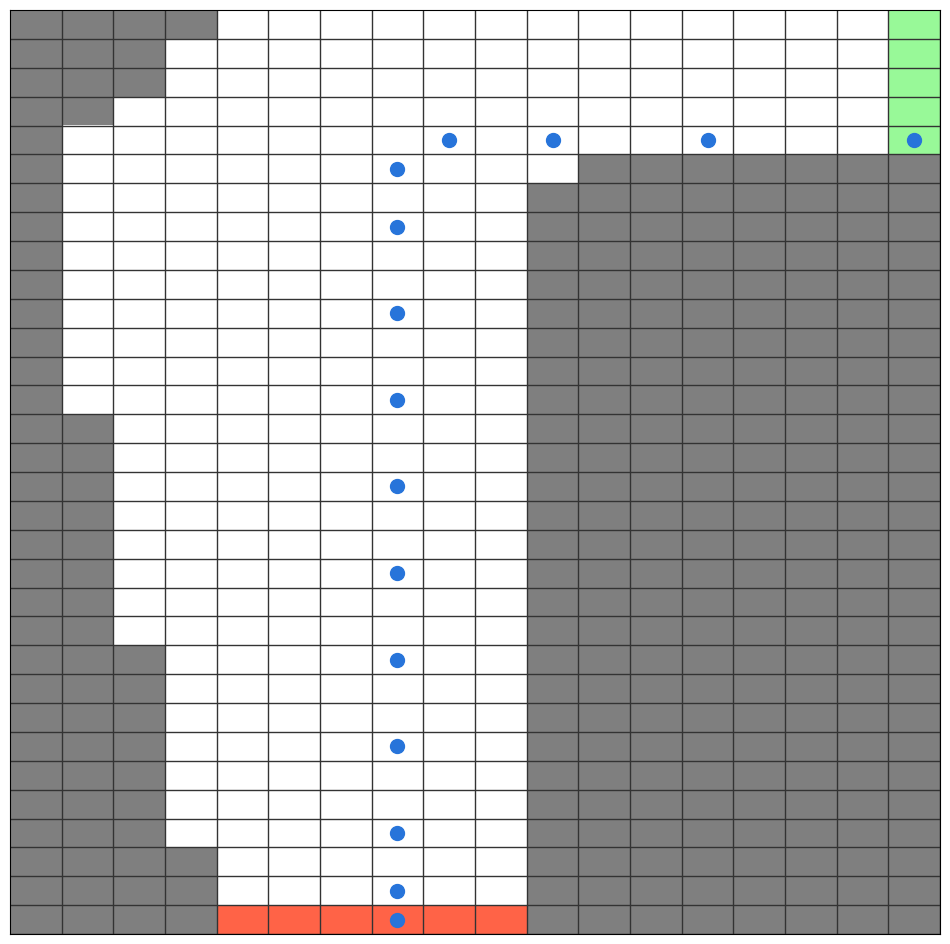

Reward: -12, Terminated: True, Truncated: False


In [268]:
env = RacetrackEnv.case_01()
agent = RacetrackTestAgent(env, actions=[
    RacetrackAction(0, 1),
    RacetrackAction(0, 1),
    RacetrackAction(0, 1),
    RacetrackAction(0, 0),
    RacetrackAction(0, 0),
    RacetrackAction(0, 0),
    RacetrackAction(0, 0),
    RacetrackAction(0, 0),
    RacetrackAction(0, 0),
    RacetrackAction(0, -1),
    RacetrackAction(1, -1),
    RacetrackAction(1, -1),
    RacetrackAction(1, 0),
    RacetrackAction(1, 0),
])
state, reward, terminated, truncated = env.test(agent=agent, seed=0)
print(f"Reward: {reward}, Terminated: {terminated}, Truncated: {truncated}")

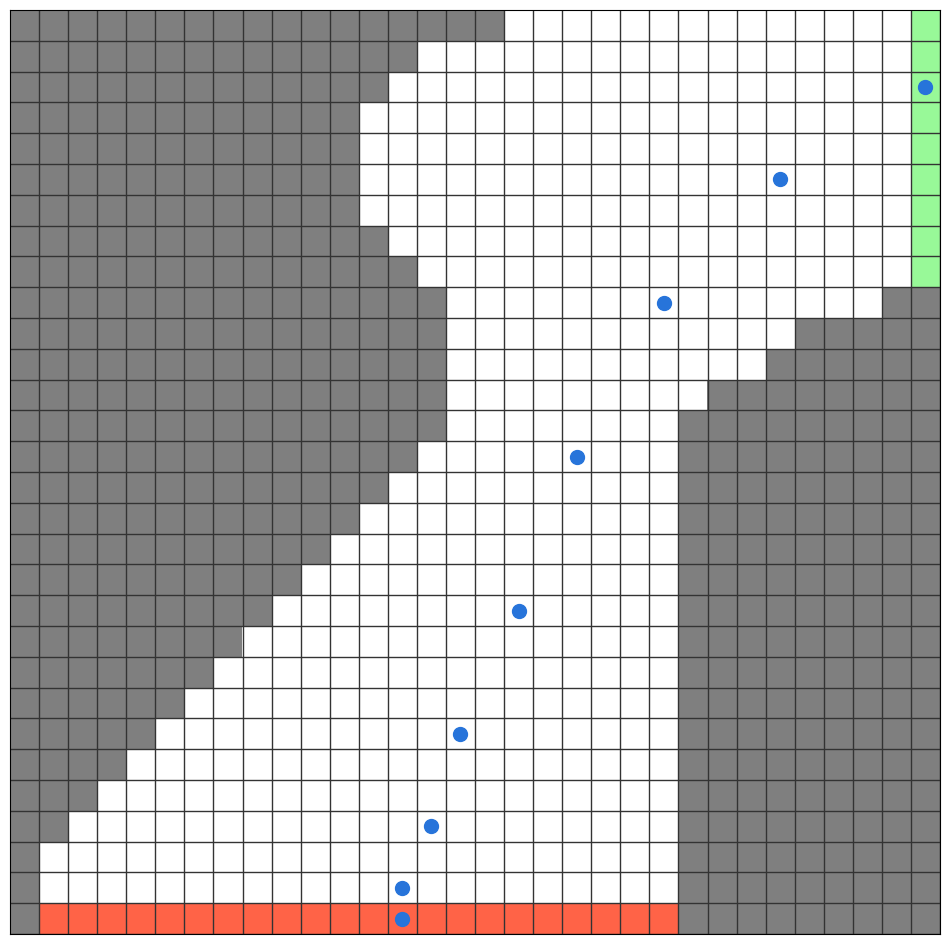

Reward: -6, Terminated: True, Truncated: False


In [269]:
env = RacetrackEnv.case_02()
agent = RacetrackTestAgent(env, actions=[
    RacetrackAction(0, 1),
    RacetrackAction(1, 1),
    RacetrackAction(0, 1),
    RacetrackAction(1, 1),
    RacetrackAction(0, 1),
    RacetrackAction(1, 0),
    RacetrackAction(1, -1),
    RacetrackAction(1, -1),
])
state, reward, terminated, truncated = env.test(agent=agent, seed=0)
print(f"Reward: {reward}, Terminated: {terminated}, Truncated: {truncated}")

Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10


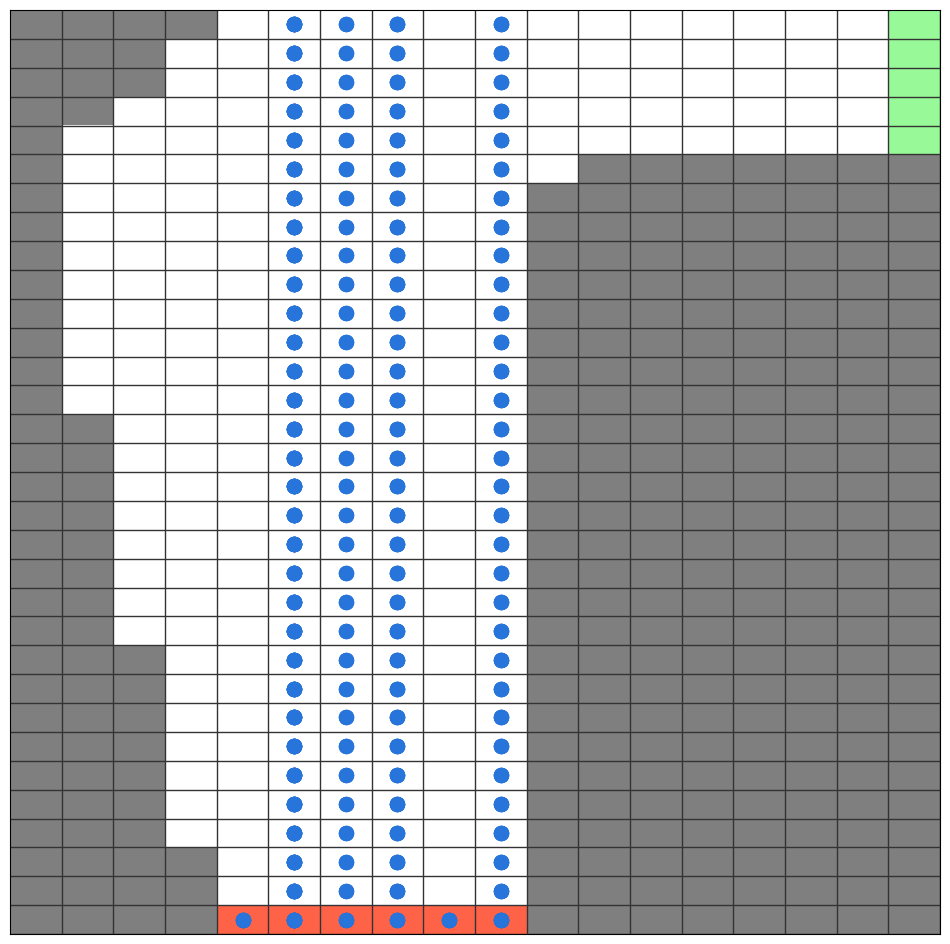

Reward: -1000, Terminated: False, Truncated: True


In [270]:
env = RacetrackEnv.case_01(max_steps=1000)
seed = 0
agent = OffPolicyRandomAgent(env=env, gamma=0.9)
agent.train(episodes=10, seed=seed)
state, reward, terminated, truncated = env.test(agent=agent, seed=seed)
print(f"Reward: {reward}, Terminated: {terminated}, Truncated: {truncated}")